In [9]:
from modsim import *
%matplotlib inline
import matplotlib.pyplot as plt



http://www.pveducation.org/pvcdrom/2-properties-sunlight/solar-radiation-space

In [10]:
degrees= UNITS.degrees

In [267]:
mkm= 1/1000

sechour= (1/60)**2 

mass_sun= 1.989e30 
G= 6.673e-11 * mkm**3 
mass_toast= .5
S_B_const= 5.67e-8 
temp_S= 5772 
area_t= .01 *mkm**2
r_s= 695770 *1000 *mkm
Pow_s= 3.9e26 
Q_b= .008/273 




num_G = G* mass_sun   

num_G

dist_init= 5e8

VXinit= sqrt(2*num_G/dist_init)

VXinit


 

#I think these are all the equations and constants we need. I found a specific heat for bread that was in kg and C, 
#which I think I converted into Kelvin but it's a bit sketchy. I'm also not sure about the area of the sunward facing 
#toast side, but we can look back at that. 

23.041351522859937

In [295]:

condition= Condition(x0= 0, y0= -5e8, velocity= 18, angle = 45*degrees, duration= 1e10, T0= 0 )

In [296]:
#I'm not sure I'm doing this right, I'm mostly copying this from chapter 10 with the intro to vectors and the baseball. 

def make_system(condition):
    unpack(condition)
    
    theta = np.deg2rad(angle)
    
    
    
    vx, vy = pol2cart(theta, velocity)
    
    init= State(x=x0, y=y0, vx= vx, vy= vy)
    area_toast = area_t 
    
    ts= linspace(0, duration, 100)
    
    return System(init= init, mass= mass_toast, area_t= area_t, T= T0, Q_b= Q_b, ts= ts)

system= make_system(condition) 




In [297]:
def slope_func(state, t, system):
    x, y, vx, vy = state
    
    unpack(system)
    dist= sqrt(x**2+y**2)
    P= Vector(-x, -y) 
    V= Vector(vx, vy) 
    tan_vect= Vector((-y/dist), (x/ dist))
    tan_v= tan_vect/tan_vect.mag
    print(tan_v)
    
    xdir= -x/ dist
    ydir= -y/dist
    w= V.proj(tan_v)
    

    F_grav= G* mass_sun *mass_toast/ (dist)**2
    
    a_grav= Vector(xdir, ydir) *((F_grav)/mass_toast) 
    a_cent= Vector(-xdir, -ydir) *(w.mag**2)/dist
    
    #print(a_cent)
    ax= a_grav.x + a_cent.x
    ay= a_grav.y + a_cent.y
    
    
    rad_on_toast= t * Pow_s * r_s**2/ P.mag**2 
    temp_toast= rad_on_toast/ Q_b / mass_toast 
    
    
    return vx, vy, ax, ay
    
    
                     
    
    
slope_func(system.init,1,system)
    

[ 1.  0.] dimensionless


(<Quantity(12.727922061357857, 'dimensionless')>,
 <Quantity(12.727922061357857, 'dimensionless')>,
 <Quantity(0.0, 'dimensionless')>,
 <Quantity(2.0690387999999992e-07, 'dimensionless')>)

In [298]:

run_odeint(system, slope_func)

[ 1.  0.] dimensionless
[ 1.  0.] dimensionless
[  1.00000000e+00   2.44140943e-13] dimensionless
[  1.00000000e+00   4.88281886e-13] dimensionless
[  1.00000000e+00   2.44189772e-09] dimensionless
[  1.00000000e+00   4.88330716e-09] dimensionless
[  1.00000000e+00   7.32471662e-09] dimensionless
[  1.00000000e+00   3.17388119e-08] dimensionless
[  1.00000000e+00   5.61529083e-08] dimensionless
[  1.00000000e+00   8.05670059e-08] dimensionless
[  1.00000000e+00   3.24708048e-07] dimensionless
[  1.00000000e+00   5.68849209e-07] dimensionless
[  1.00000000e+00   5.68849209e-07] dimensionless
[  1.00000000e+00   3.01026738e-06] dimensionless
[  1.00000000e+00   3.01026738e-06] dimensionless
[  1.00000000e+00   5.45169746e-06] dimensionless
[  1.00000000e+00   5.45169746e-06] dimensionless
[  1.00000000e+00   7.89313947e-06] dimensionless
[  1.00000000e+00   7.89313947e-06] dimensionless
[  1.00000000e+00   1.03345934e-05] dimensionless
[  1.00000000e+00   1.03345934e-05] dimensionless
[ 

[-0.93468707  0.35547162] dimensionless
[-0.93745498  0.34810654] dimensionless
[-0.93745498  0.34810654] dimensionless
[-0.94005332  0.34102751] dimensionless
[-0.94005332  0.34102751] dimensionless
[-0.94249743  0.3342134 ] dimensionless
[-0.94249743  0.3342134 ] dimensionless
[-0.94480082  0.32764526] dimensionless
[-0.94480082  0.32764526] dimensionless
[-0.94697543  0.32130599] dimensionless
[-0.94697543  0.32130599] dimensionless
[-0.94903186  0.31518016] dimensionless
[-0.94903186  0.31518016] dimensionless
[-0.95155345  0.30748337] dimensionless
[-0.95155345  0.30748337] dimensionless
[-0.95390823  0.30009845] dimensionless
[-0.95390823  0.30009845] dimensionless
[-0.95611225  0.29300062] dimensionless
[-0.95611225  0.29300062] dimensionless
[-0.95817952  0.28616779] dimensionless
[-0.95817952  0.28616779] dimensionless
[-0.96012233  0.27958024] dimensionless
[-0.96012233  0.27958024] dimensionless
[-0.96195151  0.27322023] dimensionless
[-0.96195151  0.27322023] dimensionless


[-0.69164558 -0.72223707] dimensionless
[-0.69164558 -0.72223707] dimensionless
[-0.66605757 -0.74590034] dimensionless
[-0.66605757 -0.74590034] dimensionless
[-0.64044517 -0.76800389] dimensionless
[-0.64044517 -0.76800389] dimensionless
[-0.61491886 -0.78859038] dimensionless
[-0.61491886 -0.78859038] dimensionless
[-0.5895762  -0.80771276] dimensionless
[-0.5895762  -0.80771276] dimensionless
[-0.56091688 -0.82787212] dimensionless
[-0.56091688 -0.82787212] dimensionless
[-0.53271506 -0.84629467] dimensionless
[-0.53271507 -0.84629466] dimensionless
[-0.50505747 -0.86308571] dimensionless
[-0.50505748 -0.86308571] dimensionless
[-0.47801248 -0.87835304] dimensionless
[-0.47801249 -0.87835304] dimensionless
[-0.45163211 -0.89220426] dimensionless
[-0.45163211 -0.89220426] dimensionless
[-0.425954   -0.90474482] dimensionless
[-0.425954   -0.90474482] dimensionless
[-0.40100345 -0.91607654] dimensionless
[-0.40100345 -0.91607654] dimensionless
[-0.37279739 -0.92791277] dimensionless


In [299]:
system.results

,x,y,vx,vy
0.000000e+00,0.000000e+00,-5.000000e+08,12.727922,12.727922
1.010101e+08,7.633788e+08,9.524501e+08,2.731209,11.744236
2.020202e+08,9.089781e+08,1.943003e+09,0.628857,8.345451
3.030303e+08,9.317323e+08,2.689834e+09,-0.085484,6.583460
4.040404e+08,9.028987e+08,3.291950e+09,-0.451568,5.401958
5.050505e+08,8.452239e+08,3.790603e+09,-0.674063,4.506326
6.060606e+08,7.691967e+08,4.207849e+09,-0.822017,3.776718
7.070707e+08,6.806412e+08,4.557122e+09,-0.925531,3.153208
8.080808e+08,5.831954e+08,4.847268e+09,-0.999887,2.601596
9.090909e+08,4.793335e+08,5.084388e+09,-1.053648,2.100423


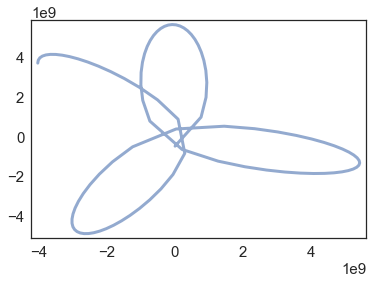

In [300]:
plot(system.results.x, system.results.y, )
#plt.axis([-6e10, 6e10, -1.2e10, 1.2e10])

In [294]:
A= Vector(1, 3)

B= Vector(2, -6)

A.proj(B.hat())

<Quantity([-0.8  2.4], 'dimensionless')>